In [8]:
!pip install ultralytics

In [39]:
import cv2
import numpy as np

In [9]:
from ultralytics import YOLO

import warnings 
warnings.filterwarnings('ignore')

In [11]:
#using yolo v8
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 184MB/s] 


In [12]:
#Python Imaging Library (PIL) fork that adds image processing capabilities to your Python environment. It allows you to open, manipulate, and save many different image file formats (JPEG, PNG, GIF, etc.).
!pip install pillow

In [13]:
from PIL import Image

In [25]:
url = "/kaggle/input/images/R.jpg"


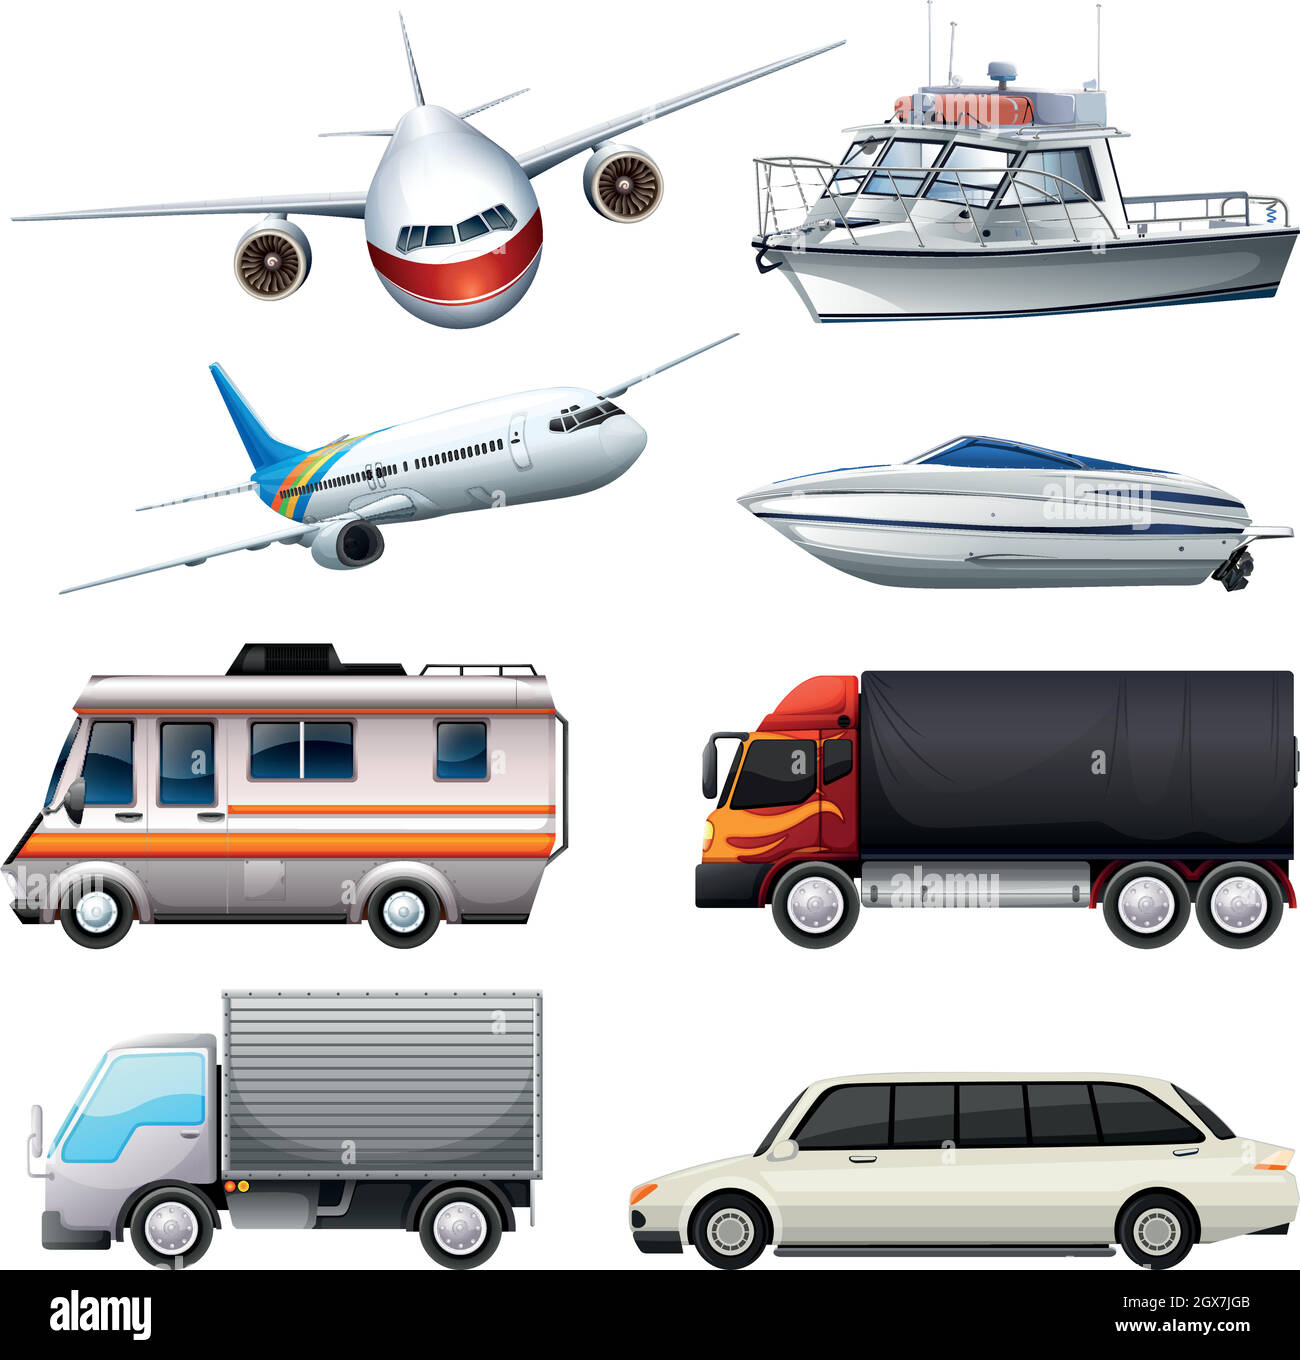

In [26]:
img = Image.open(url)
img


In [30]:
results = model.predict(url)
result = results[0]


image 1/1 /kaggle/input/images/R.jpg: 640x640 1 car, 4 airplanes, 2 trucks, 2 boats, 1026.2ms
Speed: 5.8ms preprocess, 1026.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


In [34]:
cords =result.boxes.xyxy[0].tolist()
class_id =result.boxes.cls[0].item()
conf = result.boxes.conf[0].item()

print("Object type:", result.names[class_id])
print("Coordinates:", cords)
print("Probability:", conf)



Object type: car
Coordinates: [627.6453857421875, 1070.4940185546875, 1298.035888671875, 1270.123046875]
Probability: 0.9243104457855225


In [33]:
# result.names[2]

'car'

In [36]:
#to show all images that are detected
for box in result.boxes:
    cords =box.xyxy[0].tolist()
    class_id =box.cls[0].item()
    conf = box.conf[0].item()
    
    print("Object type:",result.names[class_id],"(",class_id,")")
    print("Coordinates:", [round(cord,2) for cord in cords])
    print("Probability:", round(conf,2))
    print("------------------")

Object type: car ( 2.0 )
Coordinates: [627.65, 1070.49, 1298.04, 1270.12]
Probability: 0.92
------------------
Object type: truck ( 7.0 )
Coordinates: [28.05, 990.92, 543.95, 1270.1]
Probability: 0.87
------------------
Object type: boat ( 8.0 )
Coordinates: [751.38, 4.97, 1299.26, 322.51]
Probability: 0.65
------------------
Object type: airplane ( 4.0 )
Coordinates: [21.17, 10.99, 847.14, 594.51]
Probability: 0.55
------------------
Object type: airplane ( 4.0 )
Coordinates: [35.47, 10.04, 1299.61, 594.71]
Probability: 0.48
------------------
Object type: truck ( 7.0 )
Coordinates: [696.04, 671.86, 1295.77, 950.39]
Probability: 0.45
------------------
Object type: boat ( 8.0 )
Coordinates: [734.7, 434.4, 1292.82, 590.88]
Probability: 0.44
------------------
Object type: airplane ( 4.0 )
Coordinates: [695.34, 670.59, 1295.52, 950.93]
Probability: 0.44
------------------
Object type: airplane ( 4.0 )
Coordinates: [2.4, 658.78, 570.71, 952.82]
Probability: 0.25
------------------


In [42]:
image = np.array(img) # convert image to array
for box in result.boxes:
    cords =box.xyxy[0].tolist()
    class_id =box.cls[0].item()
    conf = box.conf[0].item()
    
    start = (int(cords[0]),int(cords[1])) # x0, y0
    end   = (int(cords[2]),int(cords[3])) # x1, y1

    cv2.rectangle(image,start,end,(0,200,0),thickness=2)
    cv2.putText(image, result.names[class_id], (start[0]+15,start[1]+30), cv2.FONT_HERSHEY_SIMPLEX,0.9, (10,0,10), 2)# show detection objects on image

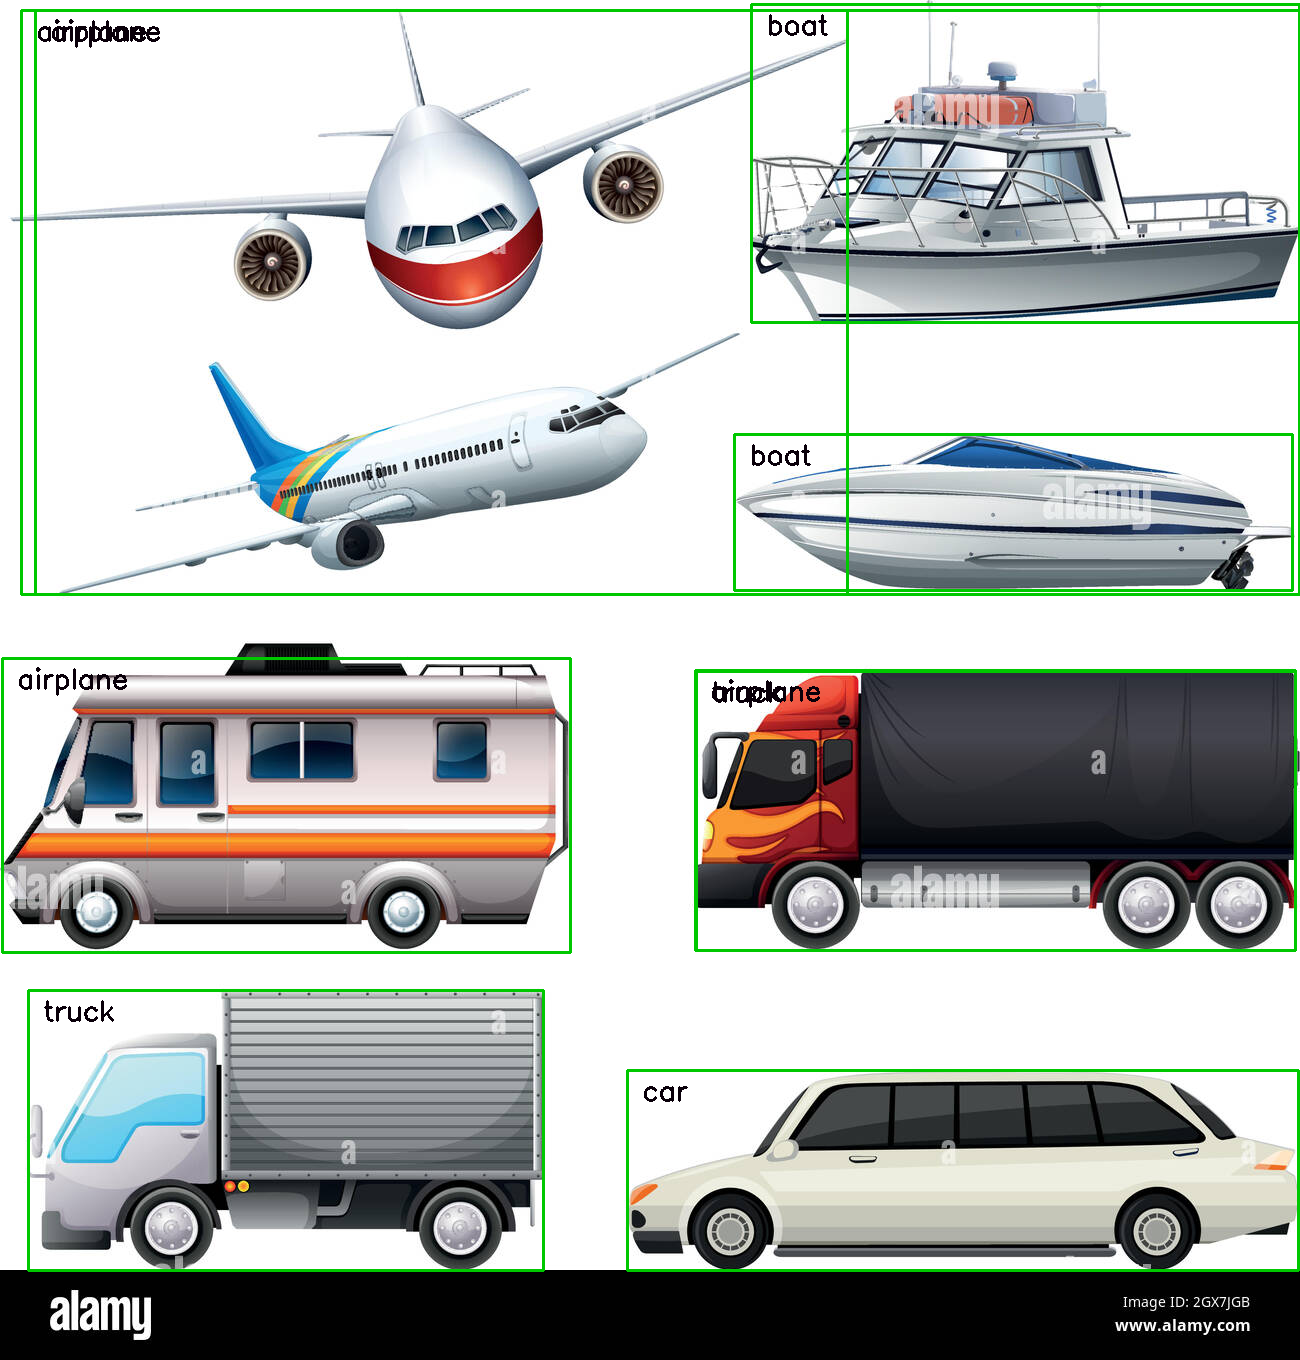

In [43]:
Image.fromarray(image)